In [1]:
library(bnlearn) |> suppressPackageStartupMessages()
library(Rgraphviz) |> suppressPackageStartupMessages()
library(tidyverse) |> suppressPackageStartupMessages()
library(gtools) |> suppressPackageStartupMessages()
library(bnstruct) |>suppressPackageStartupMessages()

# Part 2: `bnstruct` library
Implement and test the K2 algorithm with the test data sets ([3]). Compare the results with that obtained with the bnstruct R library [4].

In this Section we show the results obtained by `MMHC` on available cases, `MMHC` on imputed data and `SEM`, with the `BDeu` and `BIC` scoring functions.

### Useful functions

In [2]:
# from data.frame to BNDataset
df.to.BND <- function(dataframe) {
    df_name <- deparse(substitute(dataframe))  # to retrieve the name as a string
    new.BNDataset <- BNDataset(data = dataframe,
                          discreteness = rep("d", ncol(dataframe)),
                          variables = colnames(dataframe),
                          node.sizes = c(sapply(dataframe, function(col) length(unique(col)))),
                          starts.from = 0,  # otherwise it starts from 1 to |x| that here is also 1
                          bndataset.name = paste0(df_name, ".dataset"))
    return(new.BNDataset)
}                   

In [3]:
factor_remover <- function(dataset) {
    cols <- colnames(dataset)
    for (i in seq_along(cols)) {
        name <- cols[i]
        dataset[[name]] <- as.character(dataset[[name]])
    }
    return(dataset)
}


dataset <- function(dataset) {
    if (class(dataset) == 'data.frame') {
        return(factor_remover(dataset))
    } else if (class(dataset) == 'BNDataset') {
        df <- as.data.frame(raw.data(dataset))
        colnames(df) <- dataset@variables
        return(df)
    }
    else {
        ruiz <- data.frame(x1 = c(1, 1, 0, 1, 0, 0, 1, 0, 1, 0),
                          x2 = c(0, 1, 0, 1, 0, 1, 1, 0, 1, 0),
                          x3 = c(0, 1, 1, 1, 0, 1, 1, 0, 1, 0))
        return(ruiz)
    }
}

**PROBLEM**: `learn.network` returns an object of class **BN** which is not compatible with `graphviz.plot()` from `bnlearn` (which takes in input **bn** objects), so it's used `plot` instead.<br>The alternative solution is to convert from **BN** $\rightarrow$ **bn** manually extracting the adjacency matrix or arc list and rebuild the structure with `bnlearn`.

In [5]:
learn_network <- function(dataset, impute = FALSE, bootstrap = FALSE, algo="mmhc", score.fun="BDeu") {     #takes in input BNDataset
    start <- Sys.time()
    
    if (impute) {
        message("Imputing dataset")
        dataset <- impute(dataset)
    }
      
    if (impute && bootstrap) {
        message("Learning network imputing NA, then bootstrap.")
        net <- learn.network(dataset, 
                             use.imputed.data = TRUE,
                             bootstrap = TRUE, 
                             algo = algo,
                             score.fun = score.fun)
    } else if (impute) {
        message("Learning network using imputed data.")
        net <- learn.network(dataset, 
                             use.imputed.data = TRUE,
                             algo = algo,
                             score.fun = score.fun)
    } else if (bootstrap) {
        message("Learning network using bootstrap.")
        net <- learn.network(dataset, 
                             bootstrap = TRUE,
                             algo = algo,
                             score.fun = score.fun)
    } else {
        message("Learning network using default method.")
        net <- learn.network(dataset,
                             algo = algo,
                             score.fun = score.fun)
    }
    
    # Plot
    plot(net)
    end <- Sys.time()
    execution_time <- difftime(time1 = end, time2 = start, units = "secs") 
    cat("\nExecution Time:", execution_time, "s")
        
    return(net)
}

## Inspecting Dataset with `bnstruct`

We use `learn.network` with `mmhc` algo and two scoring functions: `BDeu` and `BIC`.

### Ruiz Dataset
All the params combinations are:
| impute | bootstrap | algo | score.fun |
|--------|-----------|------|-----------|
| FALSE  | FALSE     | mmhc | BDeu      |
| FALSE  | FALSE     | mmhc | BIC       |

In [6]:
ruiz.dataset <- dataset("ruiz") |> df.to.BND()

Learning network using default method.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 0.1650019 s

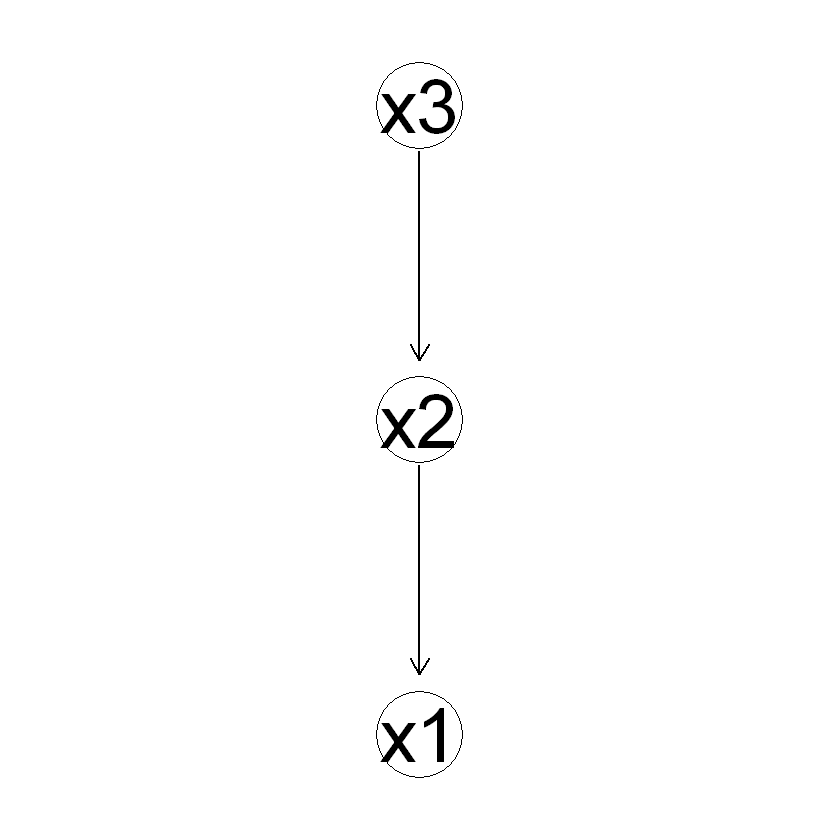

In [7]:
ruiz.net <- learn_network(dataset = ruiz.dataset, algo="mmhc", score.fun="BDeu")

Learning network using default method.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 0.26758 s

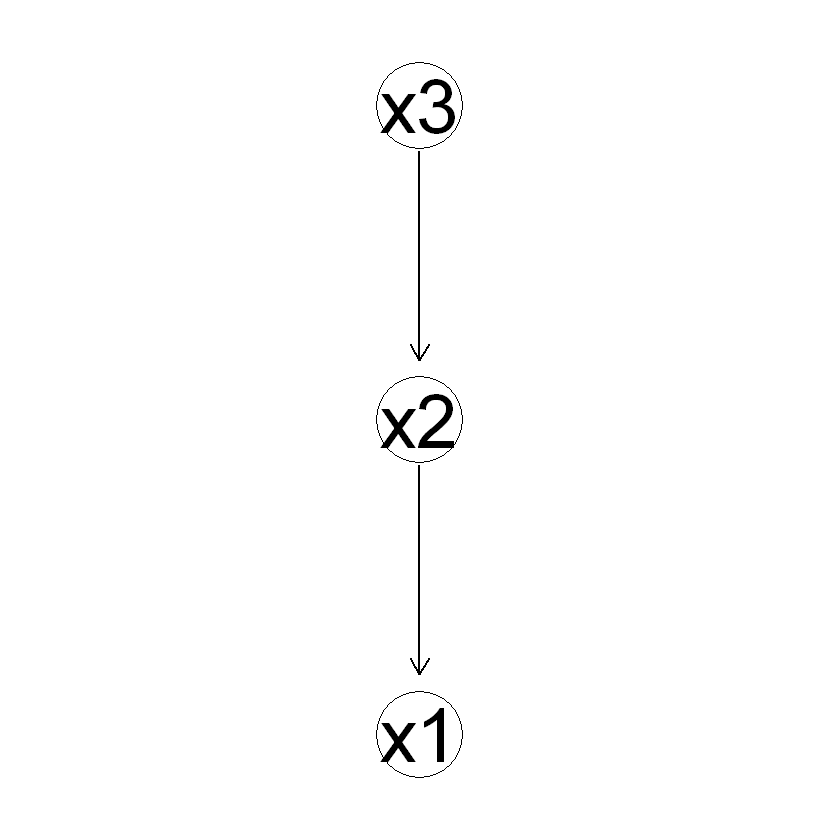

In [8]:
ruiz.bic.net <- learn_network(dataset = ruiz.dataset, algo="mmhc", score.fun="BIC")

### learning.test Dataset
All the params combinations are:
| impute | bootstrap | algo | score.fun |
|--------|-----------|------|-----------|
| FALSE  | FALSE     | mmhc | BDeu      |
| FALSE  | FALSE     | mmhc | BIC       |

In [9]:
learning.dataset <- data.frame(lapply(learning.test, function(col) as.integer(as.factor(col)) - 1)) |> df.to.BND()

Learning network using default method.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 0.137157 s

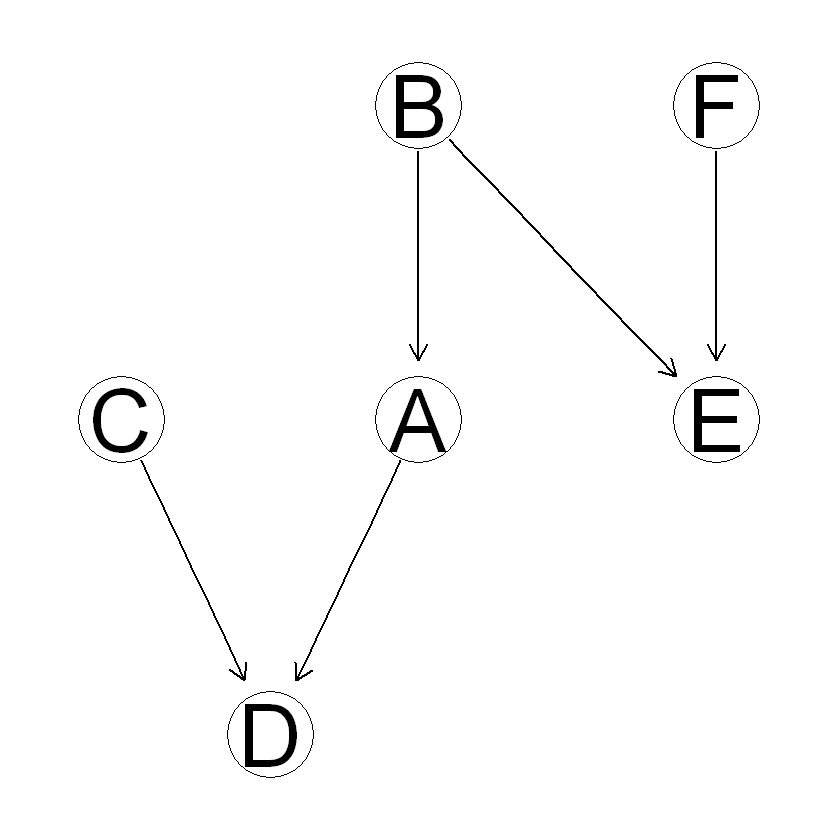

In [10]:
learning.net <- learn_network(dataset = learning.dataset, algo="mmhc", score.fun="BDeu")

Learning network using default method.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 0.1348732 s

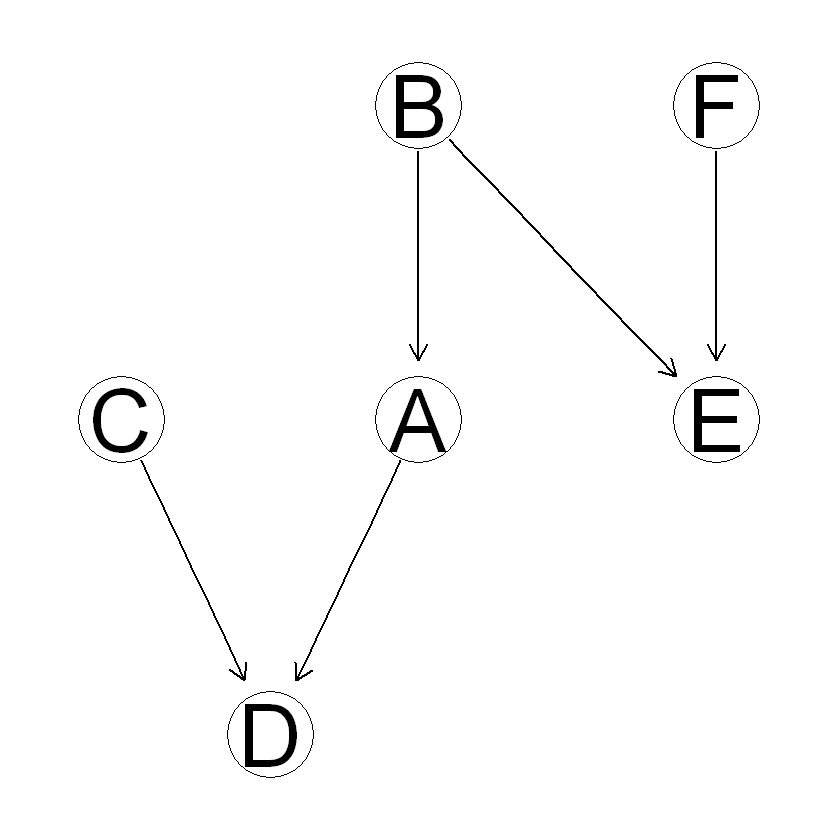

In [11]:
learning.net.bic <- learn_network(dataset = learning.dataset, algo="mmhc", score.fun="BIC")

### Asia Dataset
We also perform bootstrap so all the params combinations are:
| impute | bootstrap | algo | score.fun |
|--------|-----------|------|-----------|
| FALSE  | FALSE     | mmhc | BDeu      |
| FALSE  | FALSE     | mmhc | BIC       |
| FALSE   | TRUE     | mmhc | BDeu      |
| FALSE   | TRUE     | mmhc | BIC       |


Learning network using default method.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 0.2536869 s

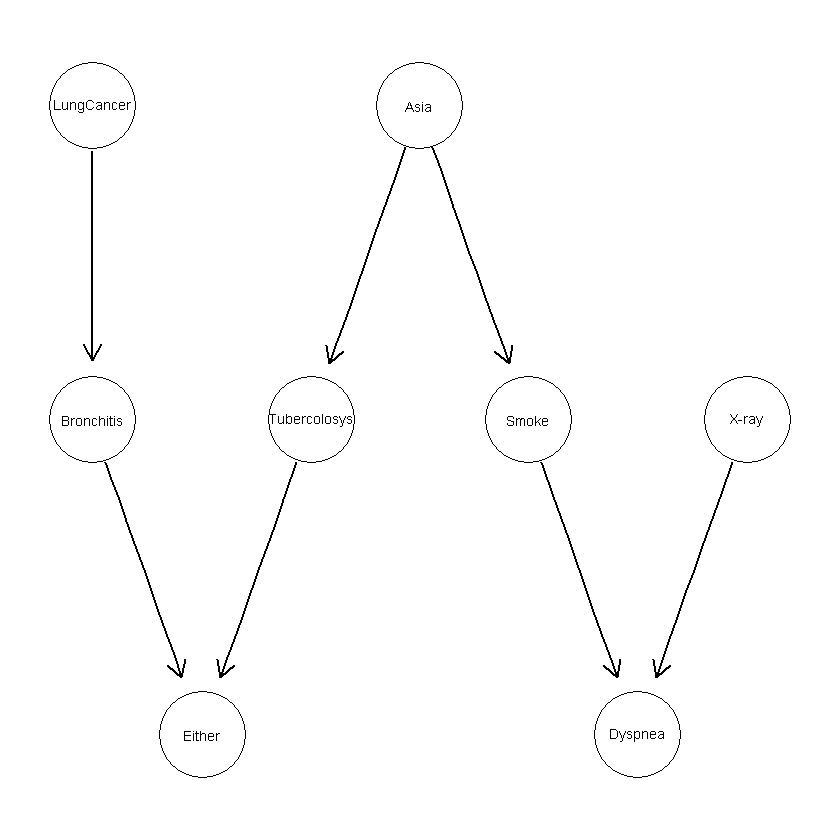

In [12]:
asia.net <- learn_network(dataset = asia(), impute = FALSE, bootstrap = FALSE, algo="mmhc", score.fun="BDeu")

Learning network using default method.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 0.2357218 s

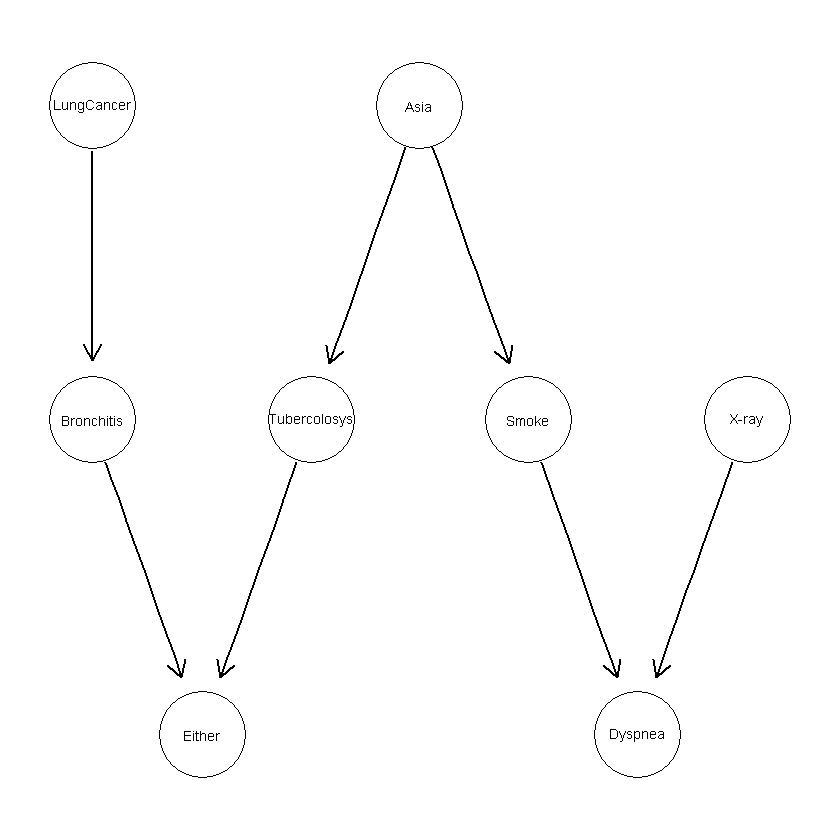

In [13]:
asia.bic.net <- learn_network(dataset = asia(), impute = FALSE, bootstrap = FALSE, algo="mmhc", score.fun="BIC")

Bootstrap on Asia dataset with $\text{bootstrap} = 100$.

In [14]:
asia.bootstrapped <- bootstrap(asia(), num.boots = 100, imputation = FALSE)

bnstruct :: Generating bootstrap samples ...

bnstruct :: Bootstrap samples generated.



Learning network using bootstrap.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.




Execution Time: 9.272174 s

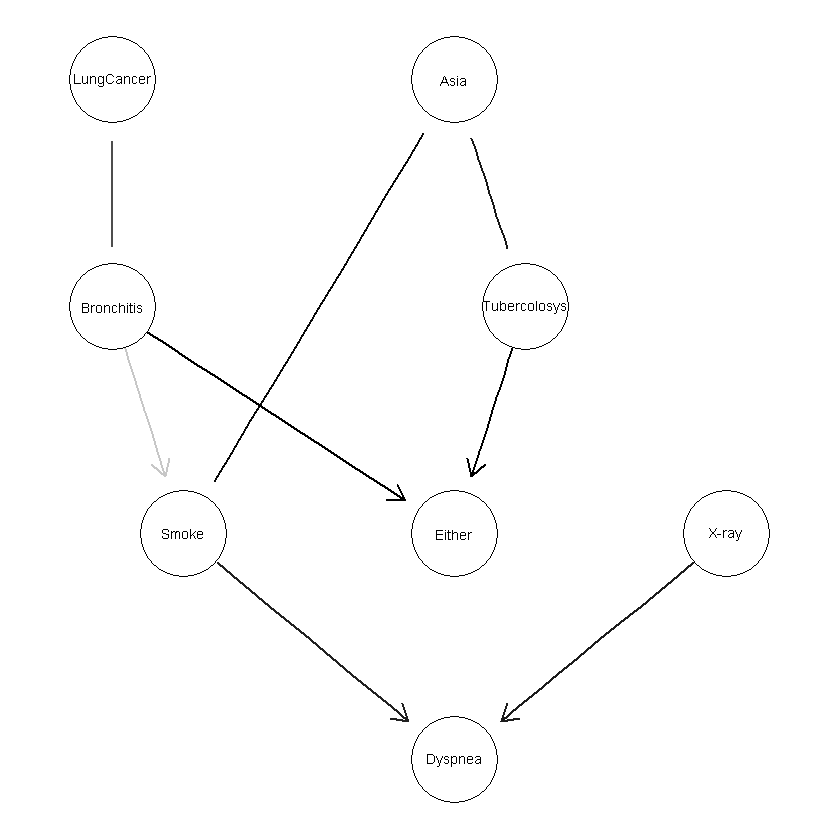

In [15]:
asia_net <- learn_network(dataset = asia.bootstrapped, impute = FALSE, bootstrap = TRUE, algo = "mmhc", score.fun = "BDeu")

Learning network using bootstrap.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.




Execution Time: 8.801947 s

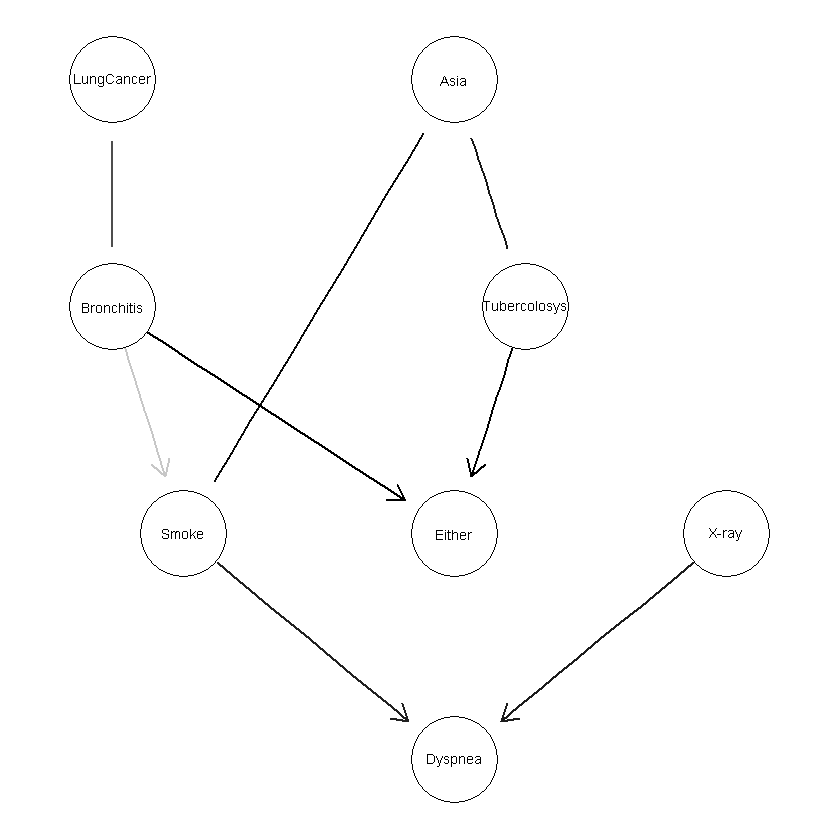

In [16]:
asia_net <- learn_network(dataset = asia.bootstrapped, impute = FALSE, bootstrap = TRUE, algo="mmhc", score.fun="BIC")

### Child Dataset
We perform imputation so all the params combinations are:
| impute | bootstrap | algo | score.fun |
|--------|-----------|------|-----------|
| FALSE  | FALSE     | mmhc | BDeu      |
| FALSE  | FALSE     | mmhc | BIC       |
| FALSE  | FALSE     | sem  | BDeu      |
| TRUE  | FALSE     | mmhc | BDeu      |
| TRUE  | FALSE     | mmhc | BIC       |

Learning network using default method.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 3.453288 s

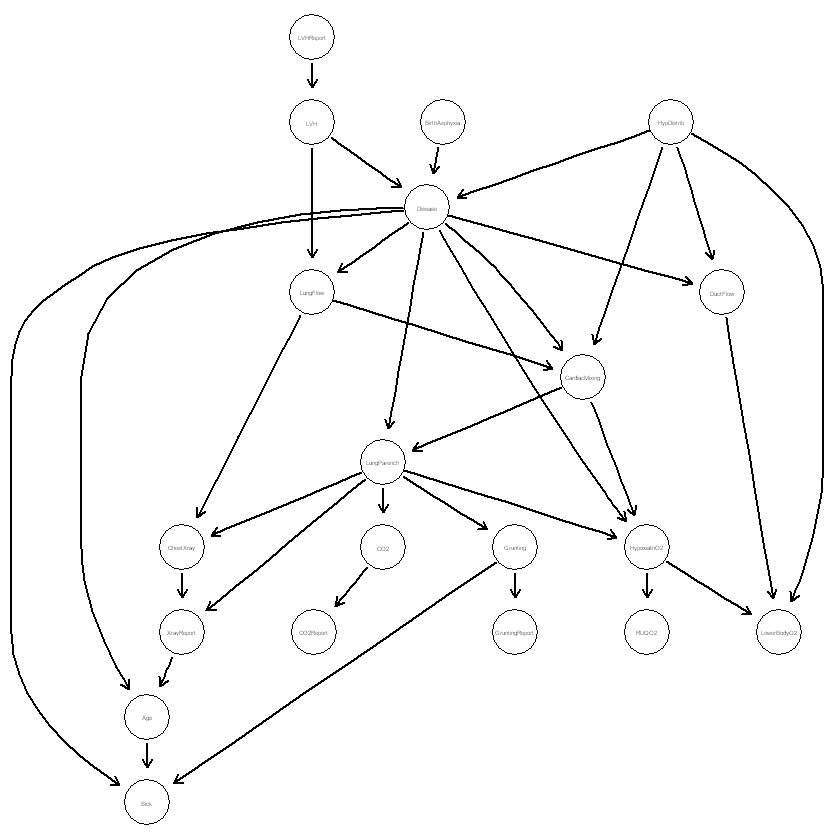

In [17]:
child_net <- learn_network(dataset = child(), impute = FALSE, bootstrap = FALSE, algo="mmhc", score.fun="BDeu")

Learning network using default method.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 3.511201 s

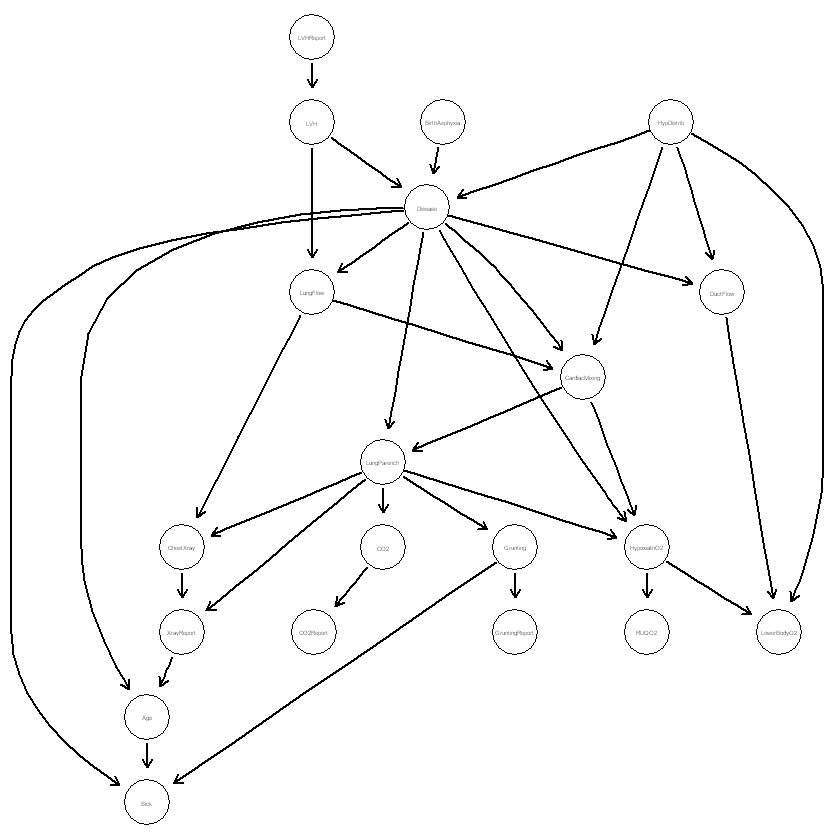

In [18]:
child.bnstruct.net <- learn_network(dataset = child(), impute = FALSE, bootstrap = FALSE, algo="mmhc", score.fun="BIC")

Learning network using default method.

bnstruct :: learning the structure using SEM ...

... bnstruct :: starting EM algorithm ...

... ... bnstruct :: learning network parameters ... 

... ... bnstruct :: parameter learning done.

... ... bnstruct :: learning network parameters ... 

... ... bnstruct :: parameter learning done.

... bnstruct :: EM algorithm completed.

... bnstruct :: learning the structure using MMHC ...

... bnstruct :: learning using MMHC completed.

... bnstruct :: learning network parameters ... 

... bnstruct :: parameter learning done.

... bnstruct :: starting EM algorithm ...

... ... bnstruct :: learning network parameters ... 

... ... bnstruct :: parameter learning done.

Warning message:
"Combining vertex/edge sequences from different graphs.
✖ This will not work in future igraph versions."
Warning message:
"Combining vertex/edge sequences from different graphs.
✖ This will not work in future igraph versions."
... ... bnstruct :: learning network paramet


Execution Time: 1153.185 s

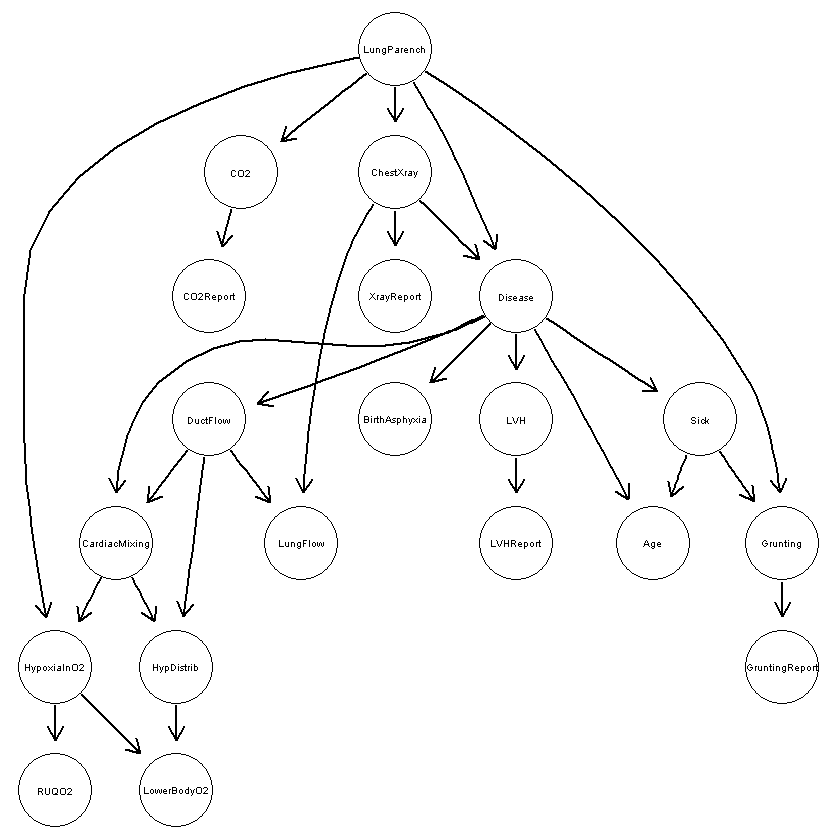

In [19]:
child_net <- learn_network(dataset = child(), impute = FALSE, bootstrap = FALSE, algo="sem", score.fun="BDeu")

In [20]:
child.imputed <- impute(object = child())

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



Imputing dataset

bnstruct :: performing imputation ...

bnstruct :: imputation finished.

Learning network using imputed data.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 15.58583 s

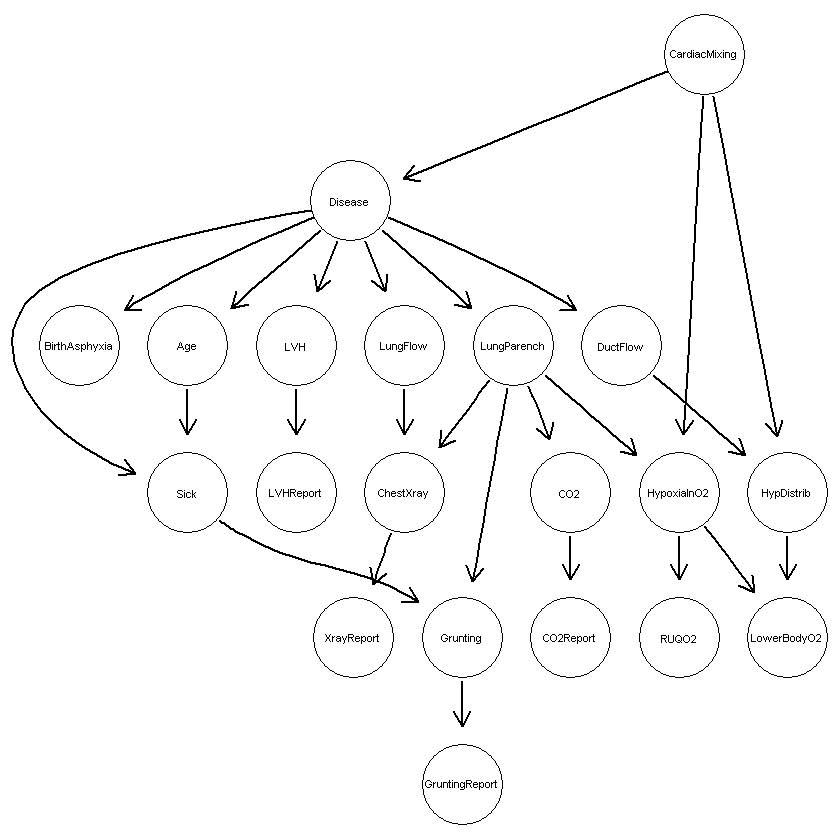

In [21]:
child_net <- learn_network(dataset = child.imputed, impute = TRUE, bootstrap = FALSE, algo="mmhc", score.fun="BDeu")

Imputing dataset

bnstruct :: performing imputation ...

bnstruct :: imputation finished.

Learning network using imputed data.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Execution Time: 16.20282 s

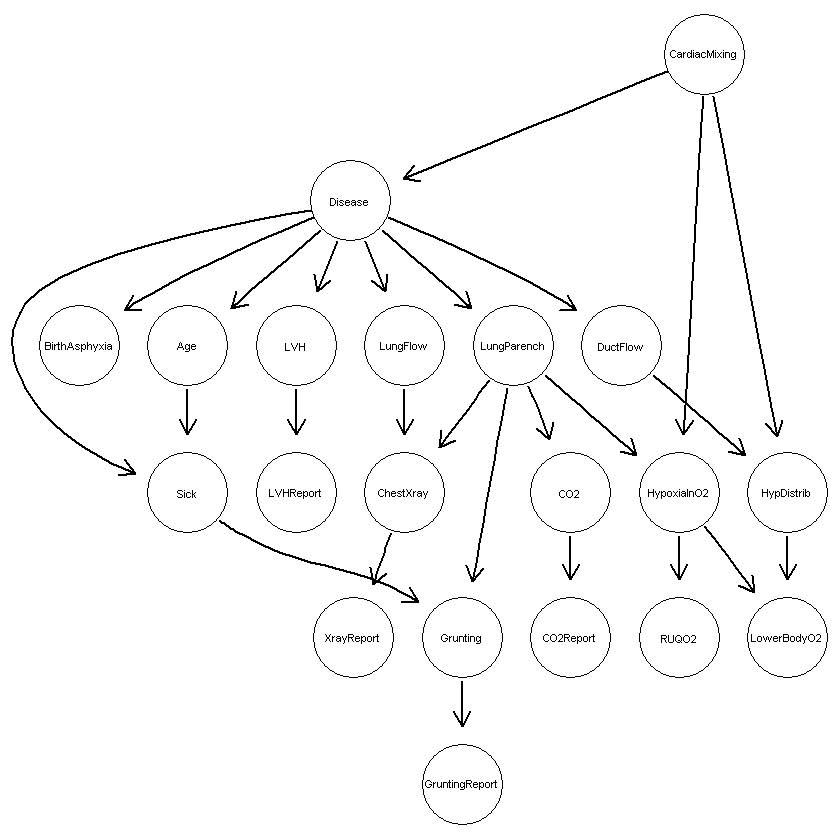

In [22]:
child_net <- learn_network(dataset = child.imputed, impute = TRUE, bootstrap = FALSE, algo="mmhc", score.fun="BIC")

## Graphical Comparison

using the DAG obtained in the first part with the K2 algorithm and the results obtained in the previous point with the `BIC` score.

In [23]:
ruiz.k2.dag <- model2network("[x1][x2|x1][x3|x2]")
learning.k2.dag <- model2network("[A][C][F][B|A][D|A:C][E|B:F]")
asia.brute.dag <- model2network("[Asia][Bronchitis][Tubercolosys|Asia][Smoke|Asia][LungCancer|Bronchitis][Either|Tubercolosys:Bronchitis][Dyspnea|Smoke:Either][X-ray|Either]")
asia.sann.dag <- model2network("[Asia][LungCancer][Bronchitis|LungCancer][Tubercolosys|Asia][Smoke|Asia][Either|Tubercolosys:Bronchitis][Dyspnea|Smoke:Either][X-ray|Either]")
child.sann.dag <- model2network( "[BirthAsphyxia][Disease|BirthAsphyxia][Age|Disease][LVH|Disease][DuctFlow|Disease][LungParench|Disease][CardiacMixing|Disease:DuctFlow][LungFlow|Disease:DuctFlow][Sick|Disease:Age][CO2|LungParench][LVHReport|Disease:LVH][HypDistrib|DuctFlow:CardiacMixing][HypoxiaInO2|CardiacMixing:LungParench][ChestXray|LungParench:LungFlow][Grunting|LungParench:Sick][CO2Report|LungParench:CO2][LowerBodyO2|HypDistrib:HypoxiaInO2][RUQO2|HypoxiaInO2][XrayReport|ChestXray][GruntingReport|Grunting]")

In [24]:
ruiz.bnstruct.dag <- model2network("[x3][x2|x3][x1|x2]")
learning.bnstruct.dag <- model2network("[C][F][B][A|B][D|A:C][E|B:F]")

asia.bnstruct.dag <- model2network("[Asia][LungCancer][X-ray][Tubercolosys|Asia][Smoke|Asia][Bronchitis|LungCancer][Either|Tubercolosys:Bronchitis][Dyspnea|Smoke:X-ray]")

model_string <- paste0("[CardiacMixing]",
                       "[Disease|CardiacMixing]",
                       "[BirthAsphyxia|Disease][Age|Disease][LVH|Disease][LungFlow|Disease][LungParench|Disease][DuctFlow|Disease]",
                       "[Sick|Disease:Age][LVHReport|LVH][ChestXray|LungFlow:LungParench][CO2|LungParench][HypoxiaInO2|LungParench:CardiacMixing][HypDistrib|DuctFlow:CardiacMixing]",
                       "[XrayReport|ChestXray][Grunting|LungParench:Sick][CO2Report|CO2][RUQO2|HypoxiaInO2][LowerBodyO2|HypoxiaInO2:HypDistrib]",
                       "[GruntingReport|Grunting]"
)
child.imputed.bnstruct.dag <- model2network(model_string)

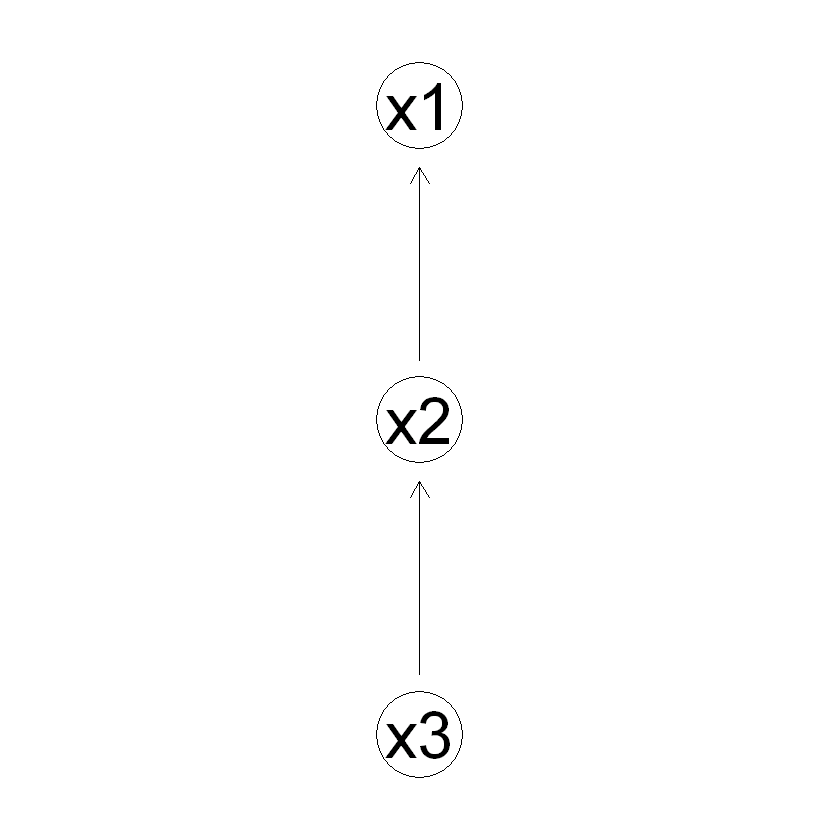

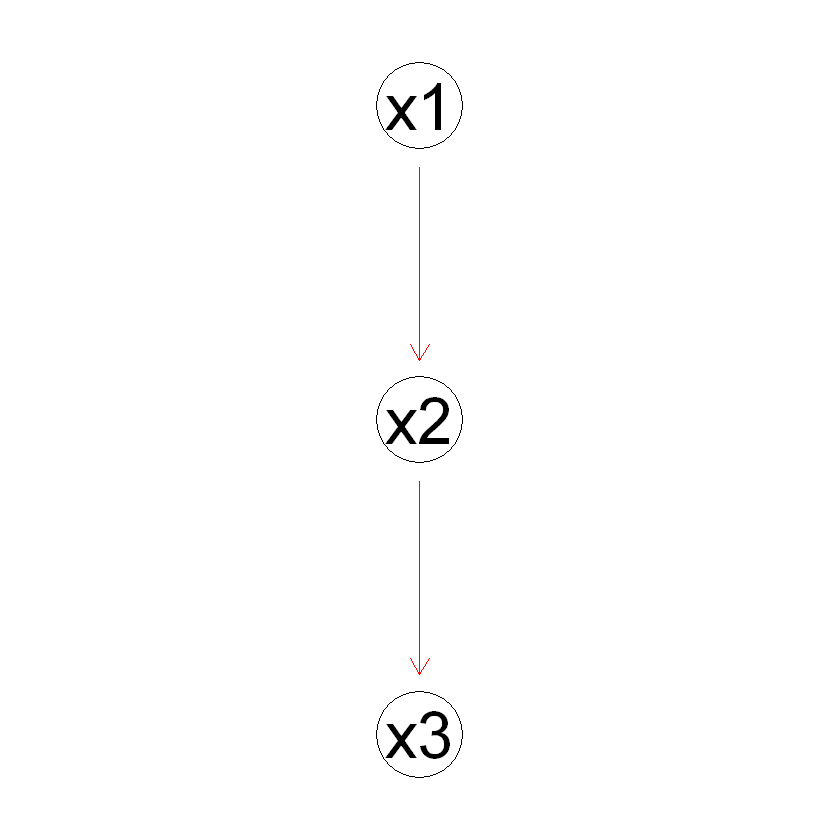

In [25]:
graphviz.compare(ruiz.bnstruct.dag, ruiz.k2.dag, shape="circle")

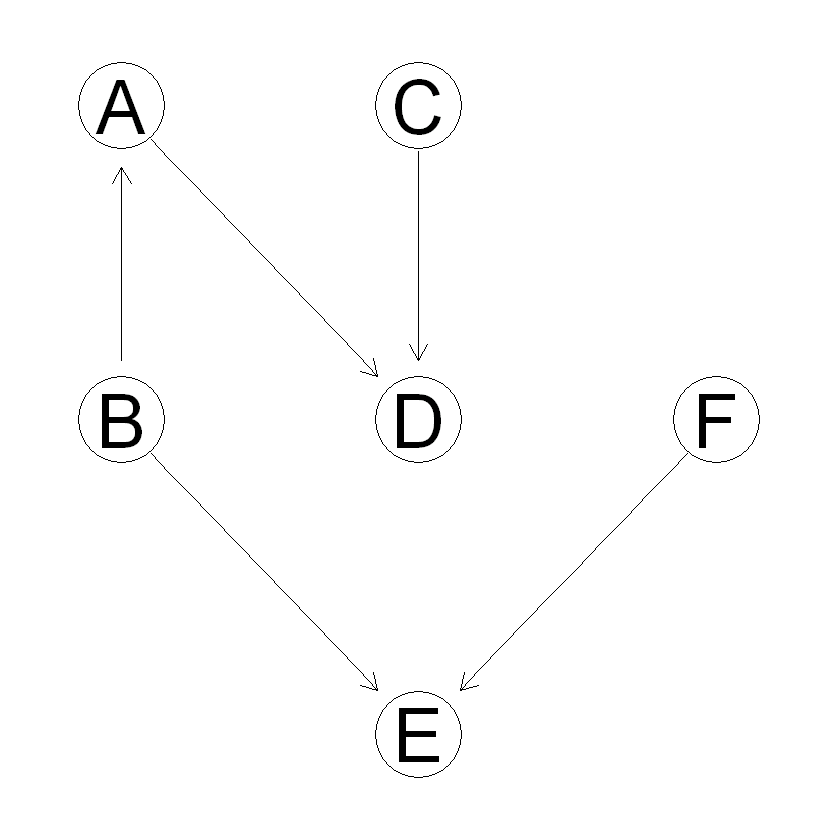

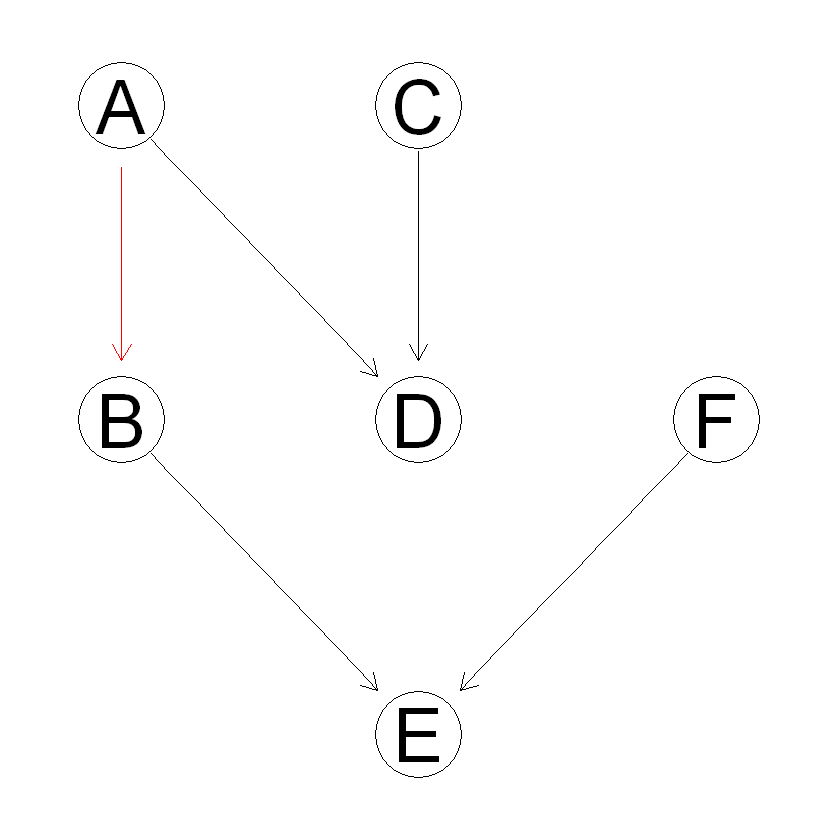

In [26]:
graphviz.compare(learning.bnstruct.dag, learning.k2.dag, shape="circle")

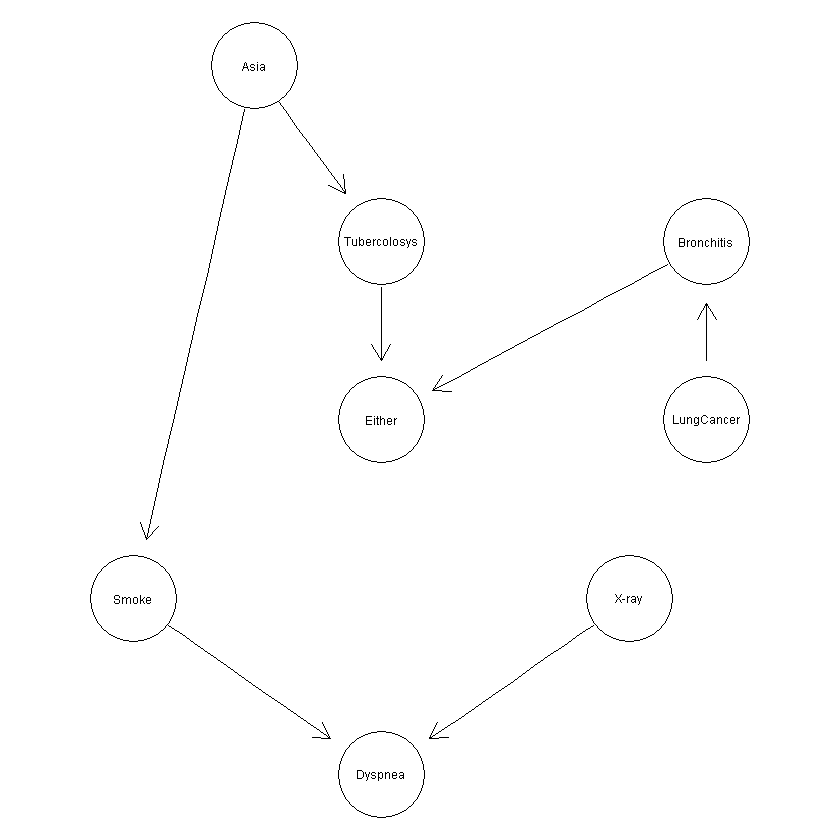

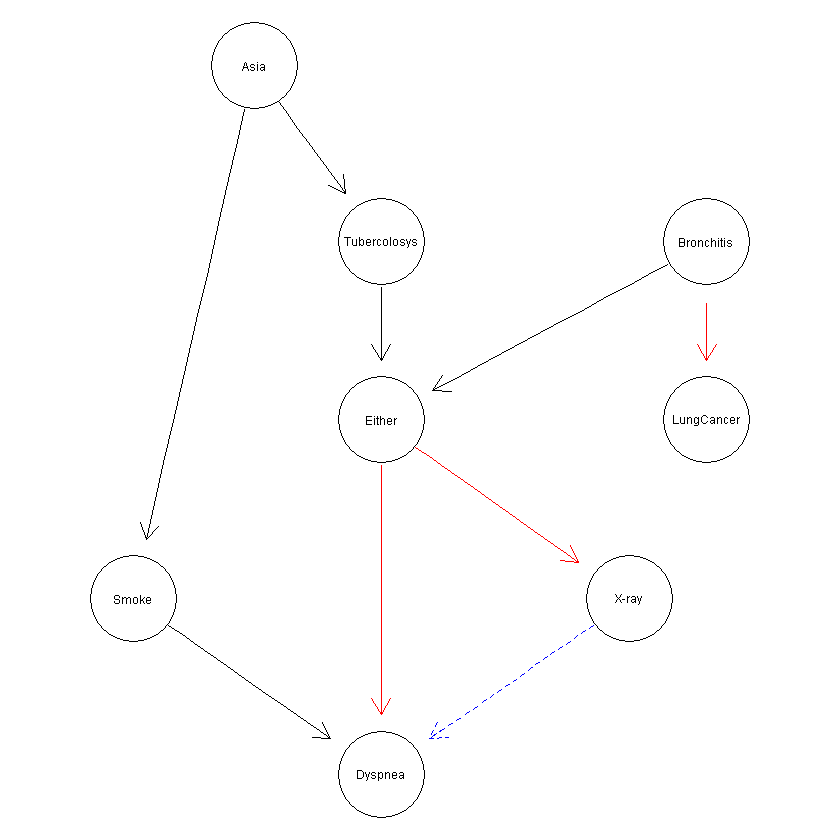

In [27]:
graphviz.compare(asia.bnstruct.dag, asia.brute.dag, shape="circle")

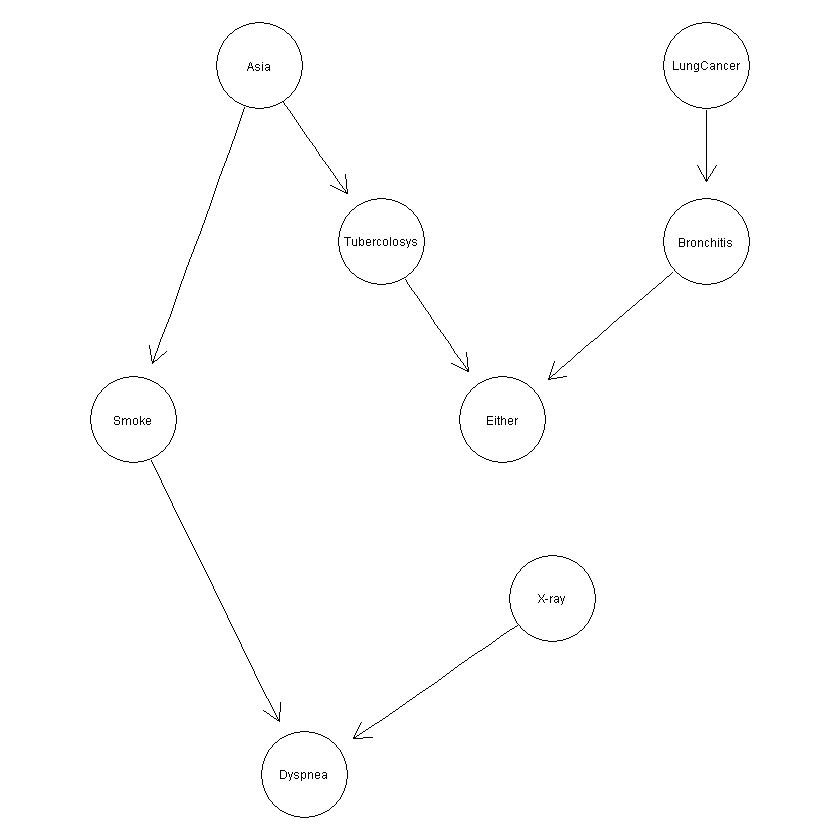

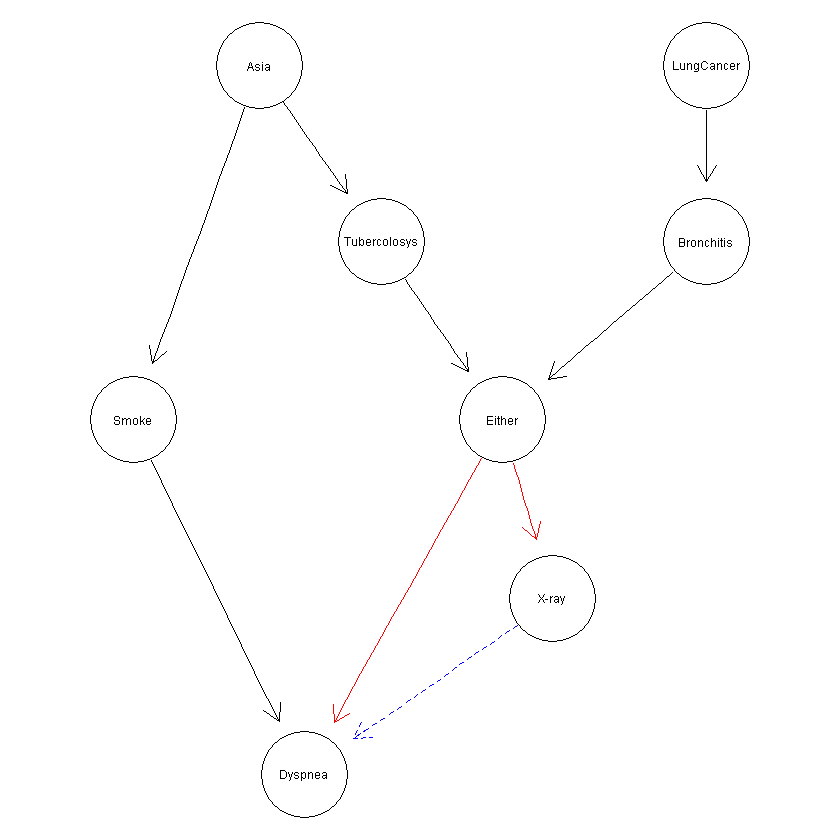

In [28]:
graphviz.compare(asia.bnstruct.dag, asia.sann.dag, shape="circle")

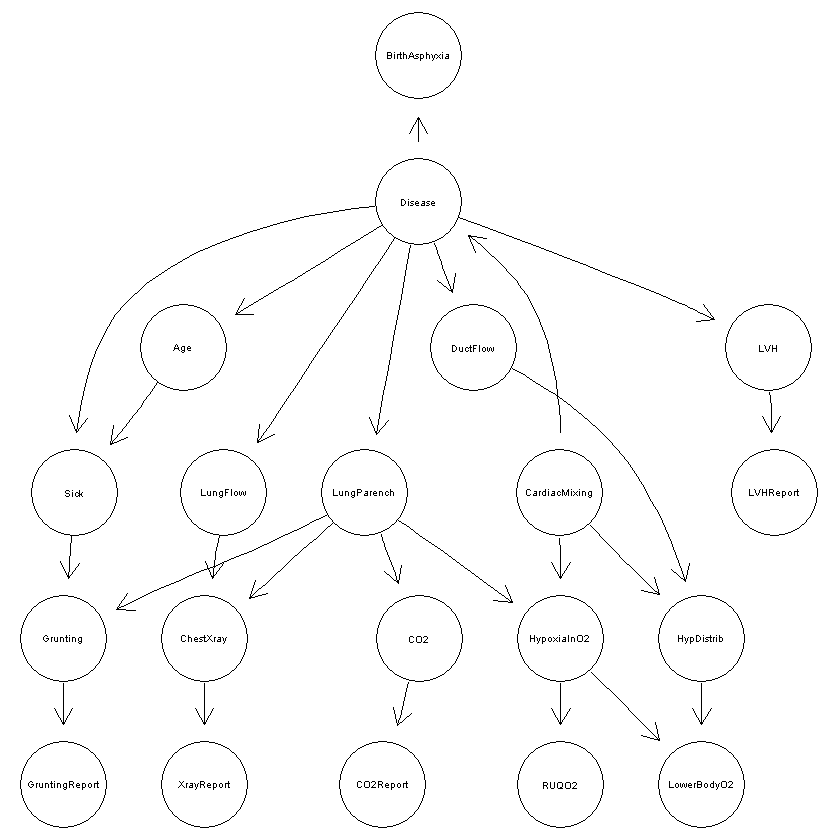

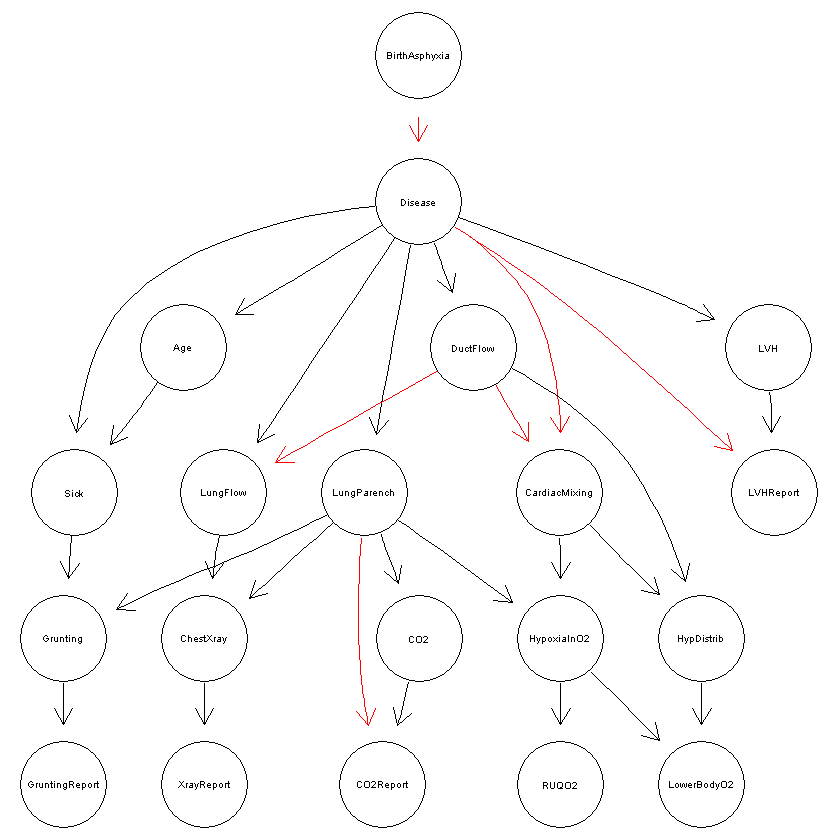

In [29]:
graphviz.compare(child.imputed.bnstruct.dag, child.sann.dag, shape="circle")